# 1. Exploring Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df = df[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color','clarity','price']]
df.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
0,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2,326
1,0.21,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1,326
2,0.23,56.9,65.0,4.05,4.07,2.31,Good,E,VS1,327
3,0.29,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2,334
4,0.31,63.3,58.0,4.34,4.35,2.75,Good,J,SI2,335


### Features 

- **Carat** weight of the diamond (0.2--5.01)
- **cut** Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal - - - **color** Color of the diamond, with D being the best and J the worst
- **clarity** How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- **depth** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table** The width of the diamond's table expressed as a percentage of its average diameter
- **price** the price of the diamond (\$326--\$18,823)
- **x** length mm (0--10.74)
- **y** width mm (0--58.9)
- **z** depth mm (0--31.8)

Categorical Features : Cut, Color, Clarity.

Numerical Features : Carat, Depth , Table , Price , X , Y, Z. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
depth      53940 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
price      53940 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Missing data dalam dataframe

In [5]:
df.isnull().sum()

carat      0
depth      0
table      0
x          0
y          0
z          0
cut        0
color      0
clarity    0
price      0
dtype: int64

#### Dataframe untuk mengetahui type data, missing data dan unique dlm data

In [6]:
dfDesc = pd.DataFrame({'dataFeatures':col,
                      'dataType':df[col].dtype ,
                      'null': sum(df[col].isnull()),
                      'nullPct': sum(df[col].isnull())/len(df)*100,
                      'unique': df[col].nunique(),
                      'uniqueSample': list(df[col].drop_duplicates().sample(2).values)}
                     for col in df.columns)

dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,carat,float64,0,0.0,273,"[0.32, 3.65]"
1,depth,float64,0,0.0,184,"[69.5, 59.9]"
2,table,float64,0,0.0,127,"[54.7, 61.5]"
3,x,float64,0,0.0,554,"[6.23, 4.87]"
4,y,float64,0,0.0,552,"[8.09, 8.63]"
5,z,float64,0,0.0,375,"[2.54, 5.73]"
6,cut,object,0,0.0,5,"[Premium, Very Good]"
7,color,object,0,0.0,7,"[G, H]"
8,clarity,object,0,0.0,8,"[IF, I1]"
9,price,int64,0,0.0,11602,"[5386, 4177]"


In [7]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


#### Menghilangkan Error dalam data
 Melihat features x, y dan z apakah terdapat nilai 0 


In [8]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,depth,table,x,y,z,cut,color,clarity,price
2207,1.00,59.1,59.0,6.55,6.48,0.0,Premium,G,SI2,3142
2314,1.01,58.1,59.0,6.66,6.60,0.0,Premium,H,I1,3167
4791,1.10,63.0,59.0,6.50,6.47,0.0,Premium,G,SI2,3696
5471,1.01,59.2,58.0,6.50,6.47,0.0,Premium,F,SI2,3837
10167,1.50,64.0,61.0,7.15,7.04,0.0,Good,G,I1,4731
11182,1.07,61.6,56.0,0.00,6.62,0.0,Ideal,F,SI2,4954
11963,1.00,63.3,53.0,0.00,0.00,0.0,Very Good,H,VS2,5139
13601,1.15,59.2,56.0,6.88,6.83,0.0,Ideal,G,VS2,5564
15951,1.14,57.5,67.0,0.00,0.00,0.0,Fair,G,VS1,6381
24394,2.18,59.4,61.0,8.49,8.45,0.0,Premium,H,SI2,12631


Jumlah nilai 0 dalam data x, y dan z

In [9]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])


20

In [10]:
df = df.drop(df.loc[df['x'] == 0].index)
df = df.drop(df.loc[df['y'] == 0].index)
df = df.drop(df.loc[df['z'] == 0].index)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
carat      53920 non-null float64
depth      53920 non-null float64
table      53920 non-null float64
x          53920 non-null float64
y          53920 non-null float64
z          53920 non-null float64
cut        53920 non-null object
color      53920 non-null object
clarity    53920 non-null object
price      53920 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [12]:
df.describe()

,carat,depth,table,x,y,z,price
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,5.731627,5.734887,3.540046,3930.993231
std,0.473795,1.432331,2.234064,1.119423,1.140126,0.702530,3987.280446
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,949.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5323.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


# 2. Correlation between Features

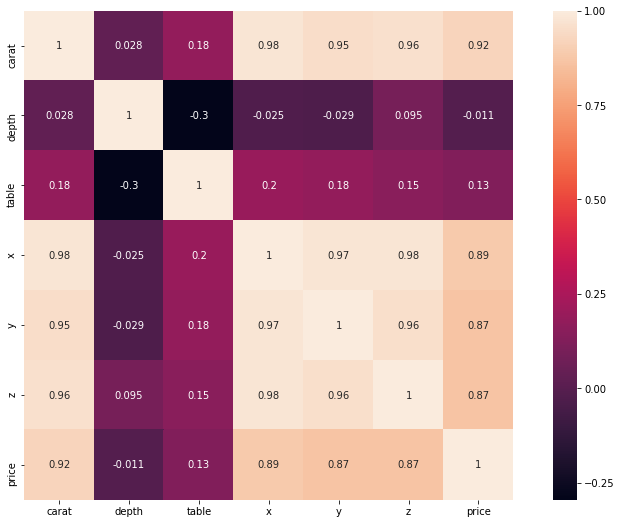

In [13]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), square=True , annot=True, cbar=True)

# 3. Visualization Data

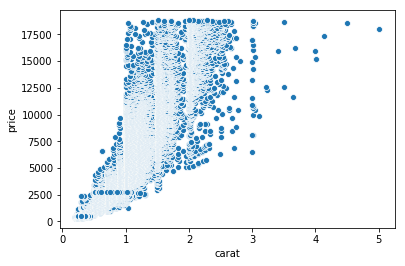

In [14]:
sns.scatterplot(x=df['carat'], y=df['price'])

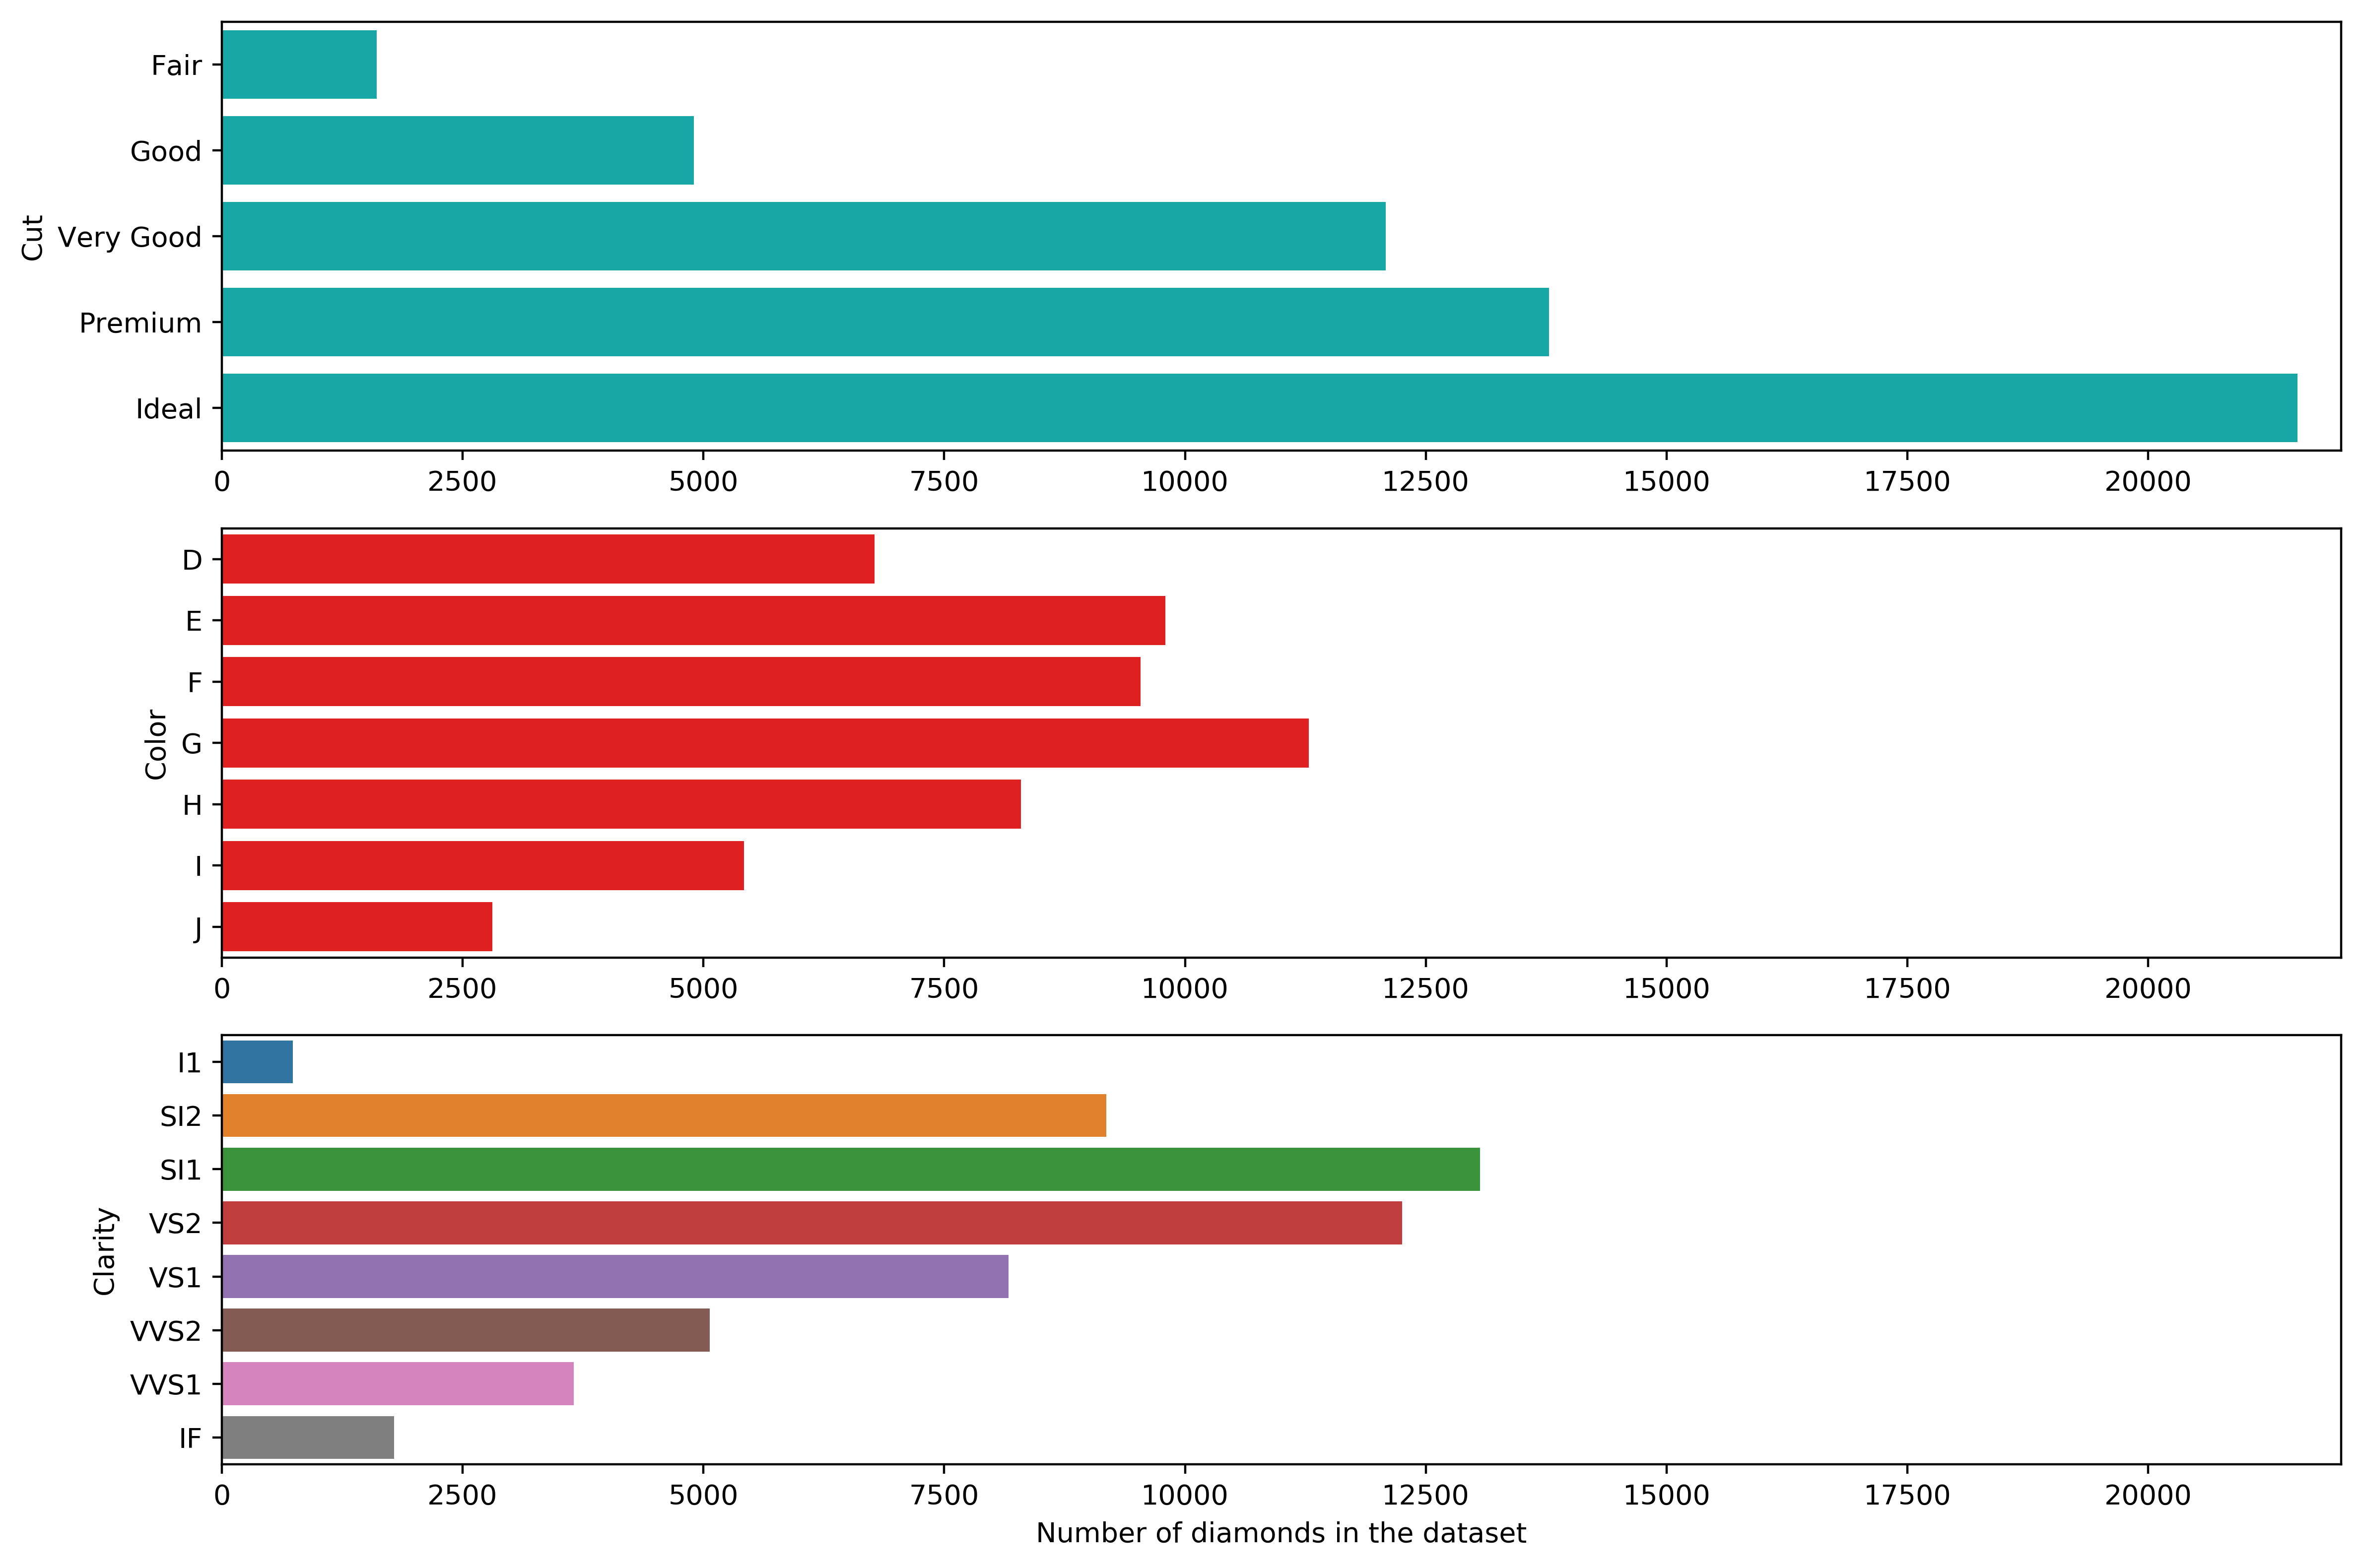

In [15]:
df['cut'] = pd.Categorical(values=df.cut, categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
df['color'] = pd.Categorical(values = df.color, categories=['D', 'E', 'F', 'G', 'H','I','J'], ordered=True)
df['clarity'] = pd.Categorical(values = df.clarity, categories=['I1', 'SI2', 'SI1','VS2','VS1','VVS2','VVS1','IF'], ordered=True)

plt.figure(figsize = (12,8), dpi=400)
plt.subplot(3,1,1)
sns.countplot(y='cut', data=df, color="c")
plt.xlim((0,22000))
plt.xlabel('')
plt.ylabel('Cut')

plt.subplot(3,1,2)
sns.countplot(y='color', data=df, color="r")
plt.ylabel('Color')
plt.xlim((0,22000))
plt.xlabel('')

plt.subplot(3,1,3)
sns.countplot(y='clarity', data=df)
plt.xlabel('Number of diamonds in the dataset')
plt.ylabel('Clarity')
plt.xlim((0,22000))

plt.tight_layout()
plt.show()

### Distribution of diamond's price via carat and color

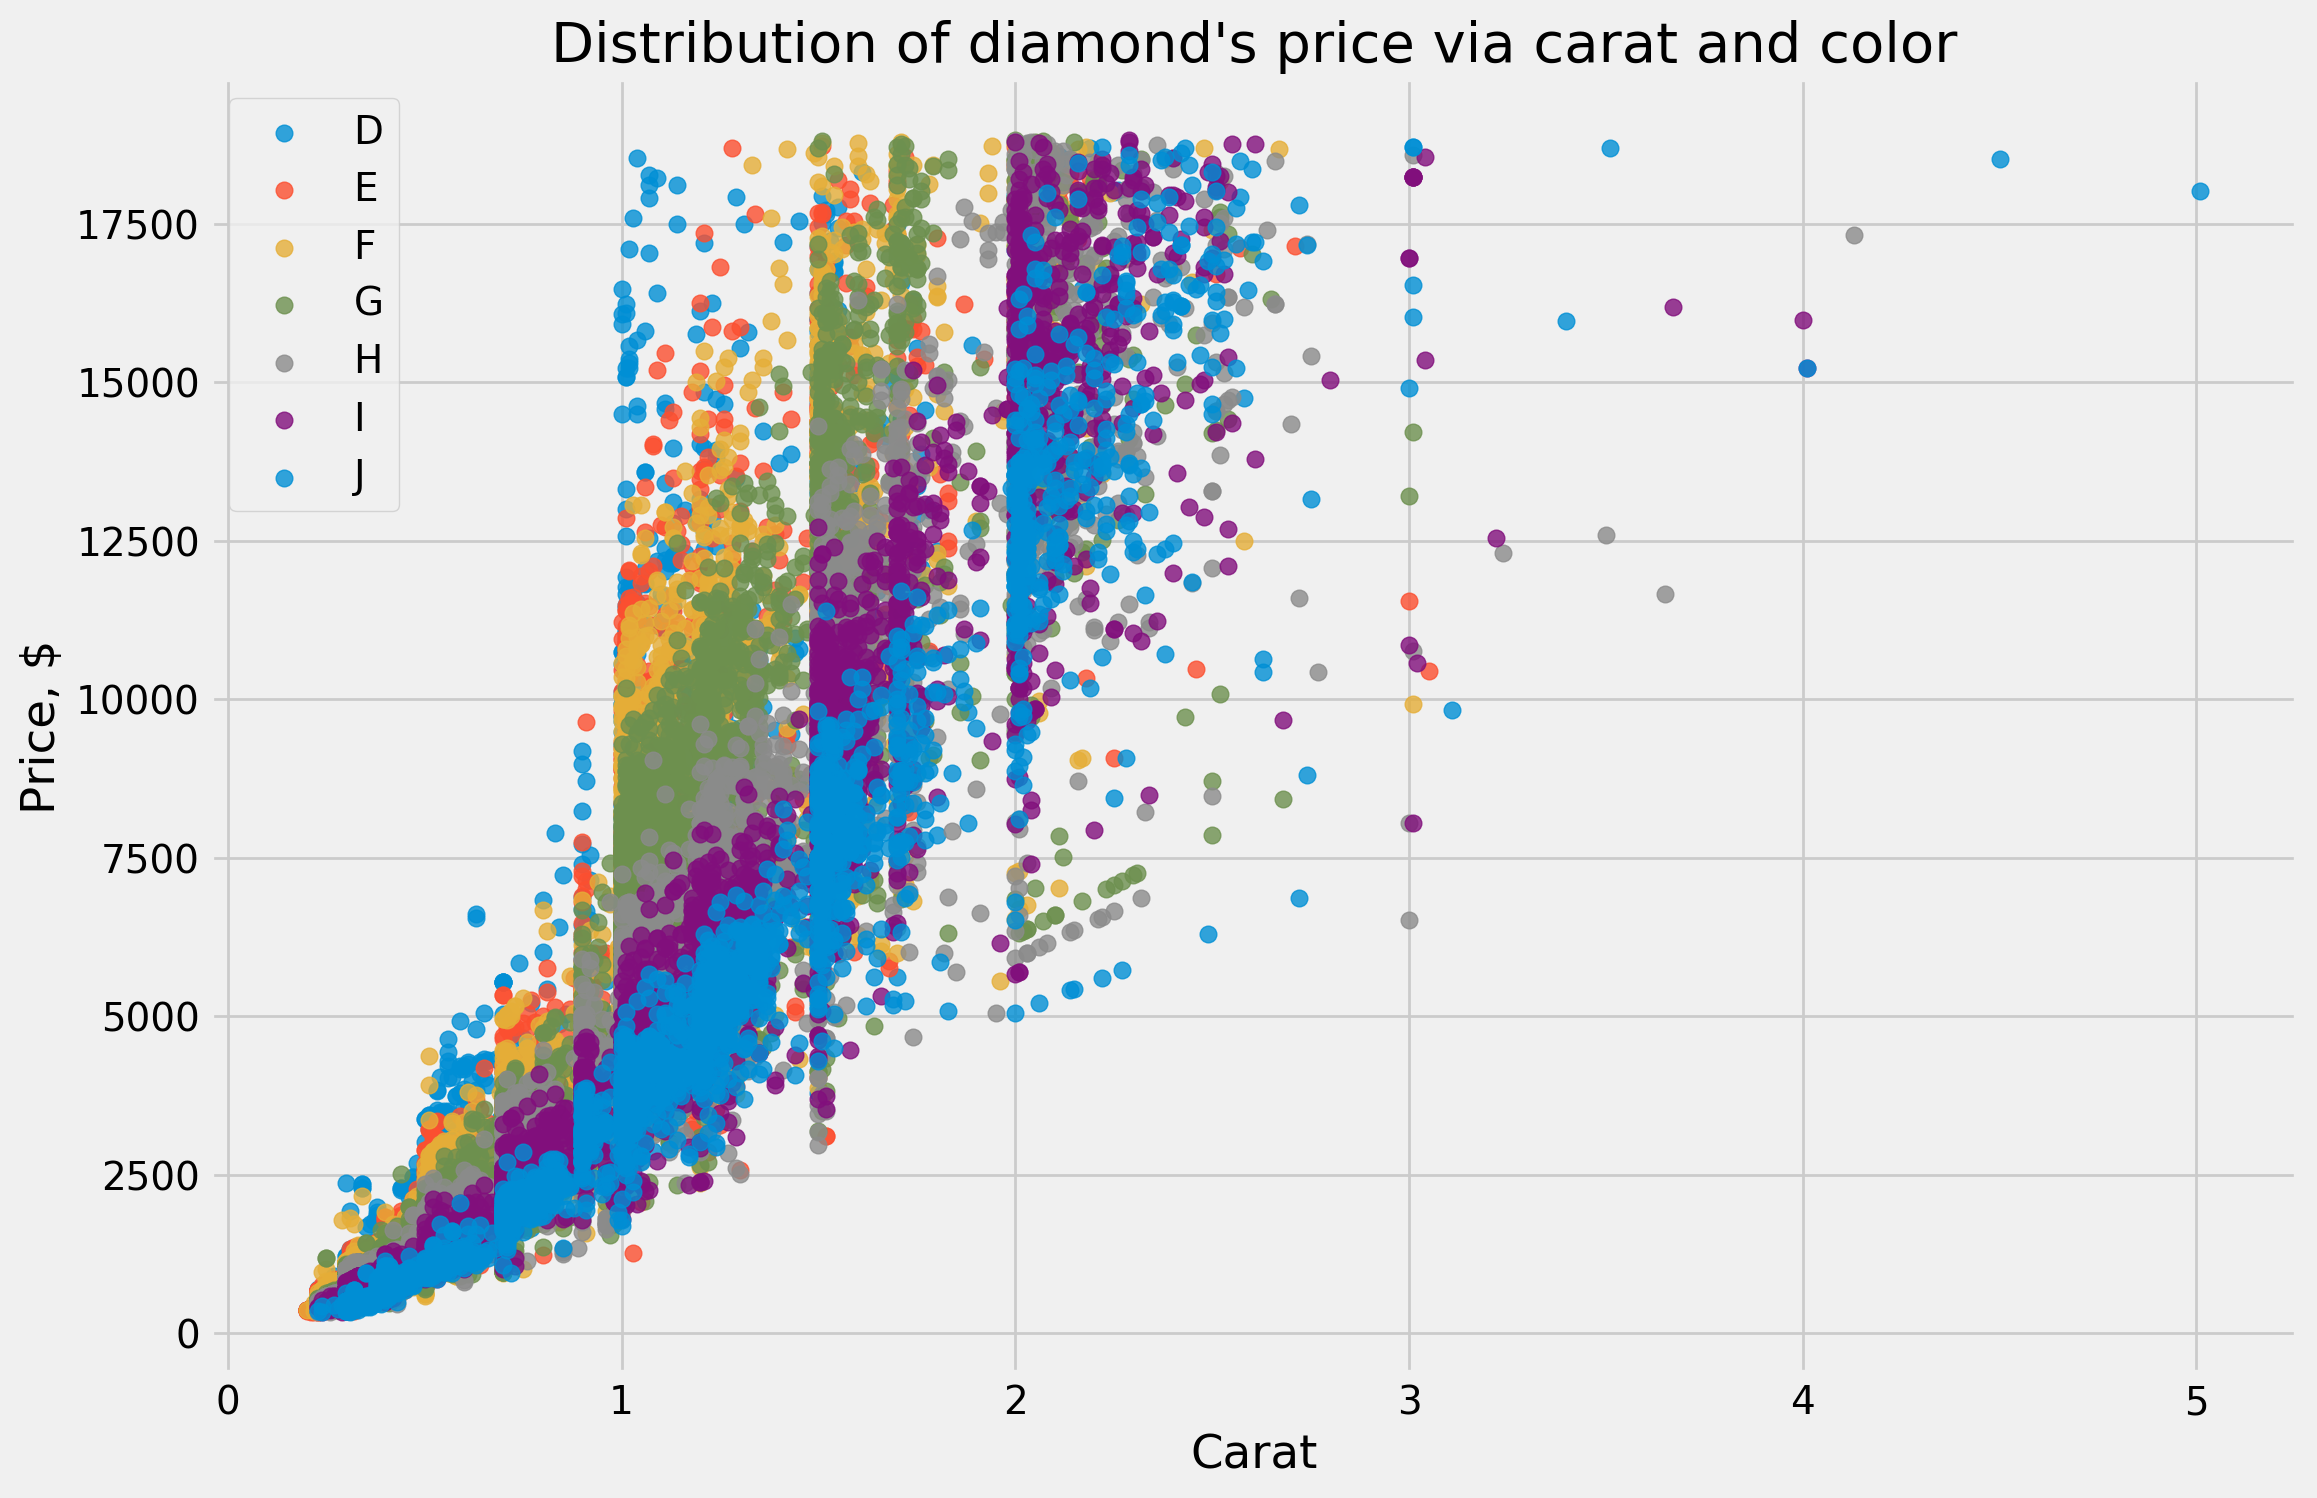

In [16]:
color_range = ['D', 'E', 'F', 'G', 'H','I','J']
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8), dpi=200)
for col in color_range:   
    plt.scatter(df[df['color']== col].carat, df[df['color']== col].price, alpha=0.8, marker = 'o', label=col)   
plt.xlabel('Carat')
plt.ylabel('Price, $')
plt.legend()
plt.title('''Distribution of diamond's price via carat and color''')
plt.show()

### Distribution of diamond's price via carat and clarity

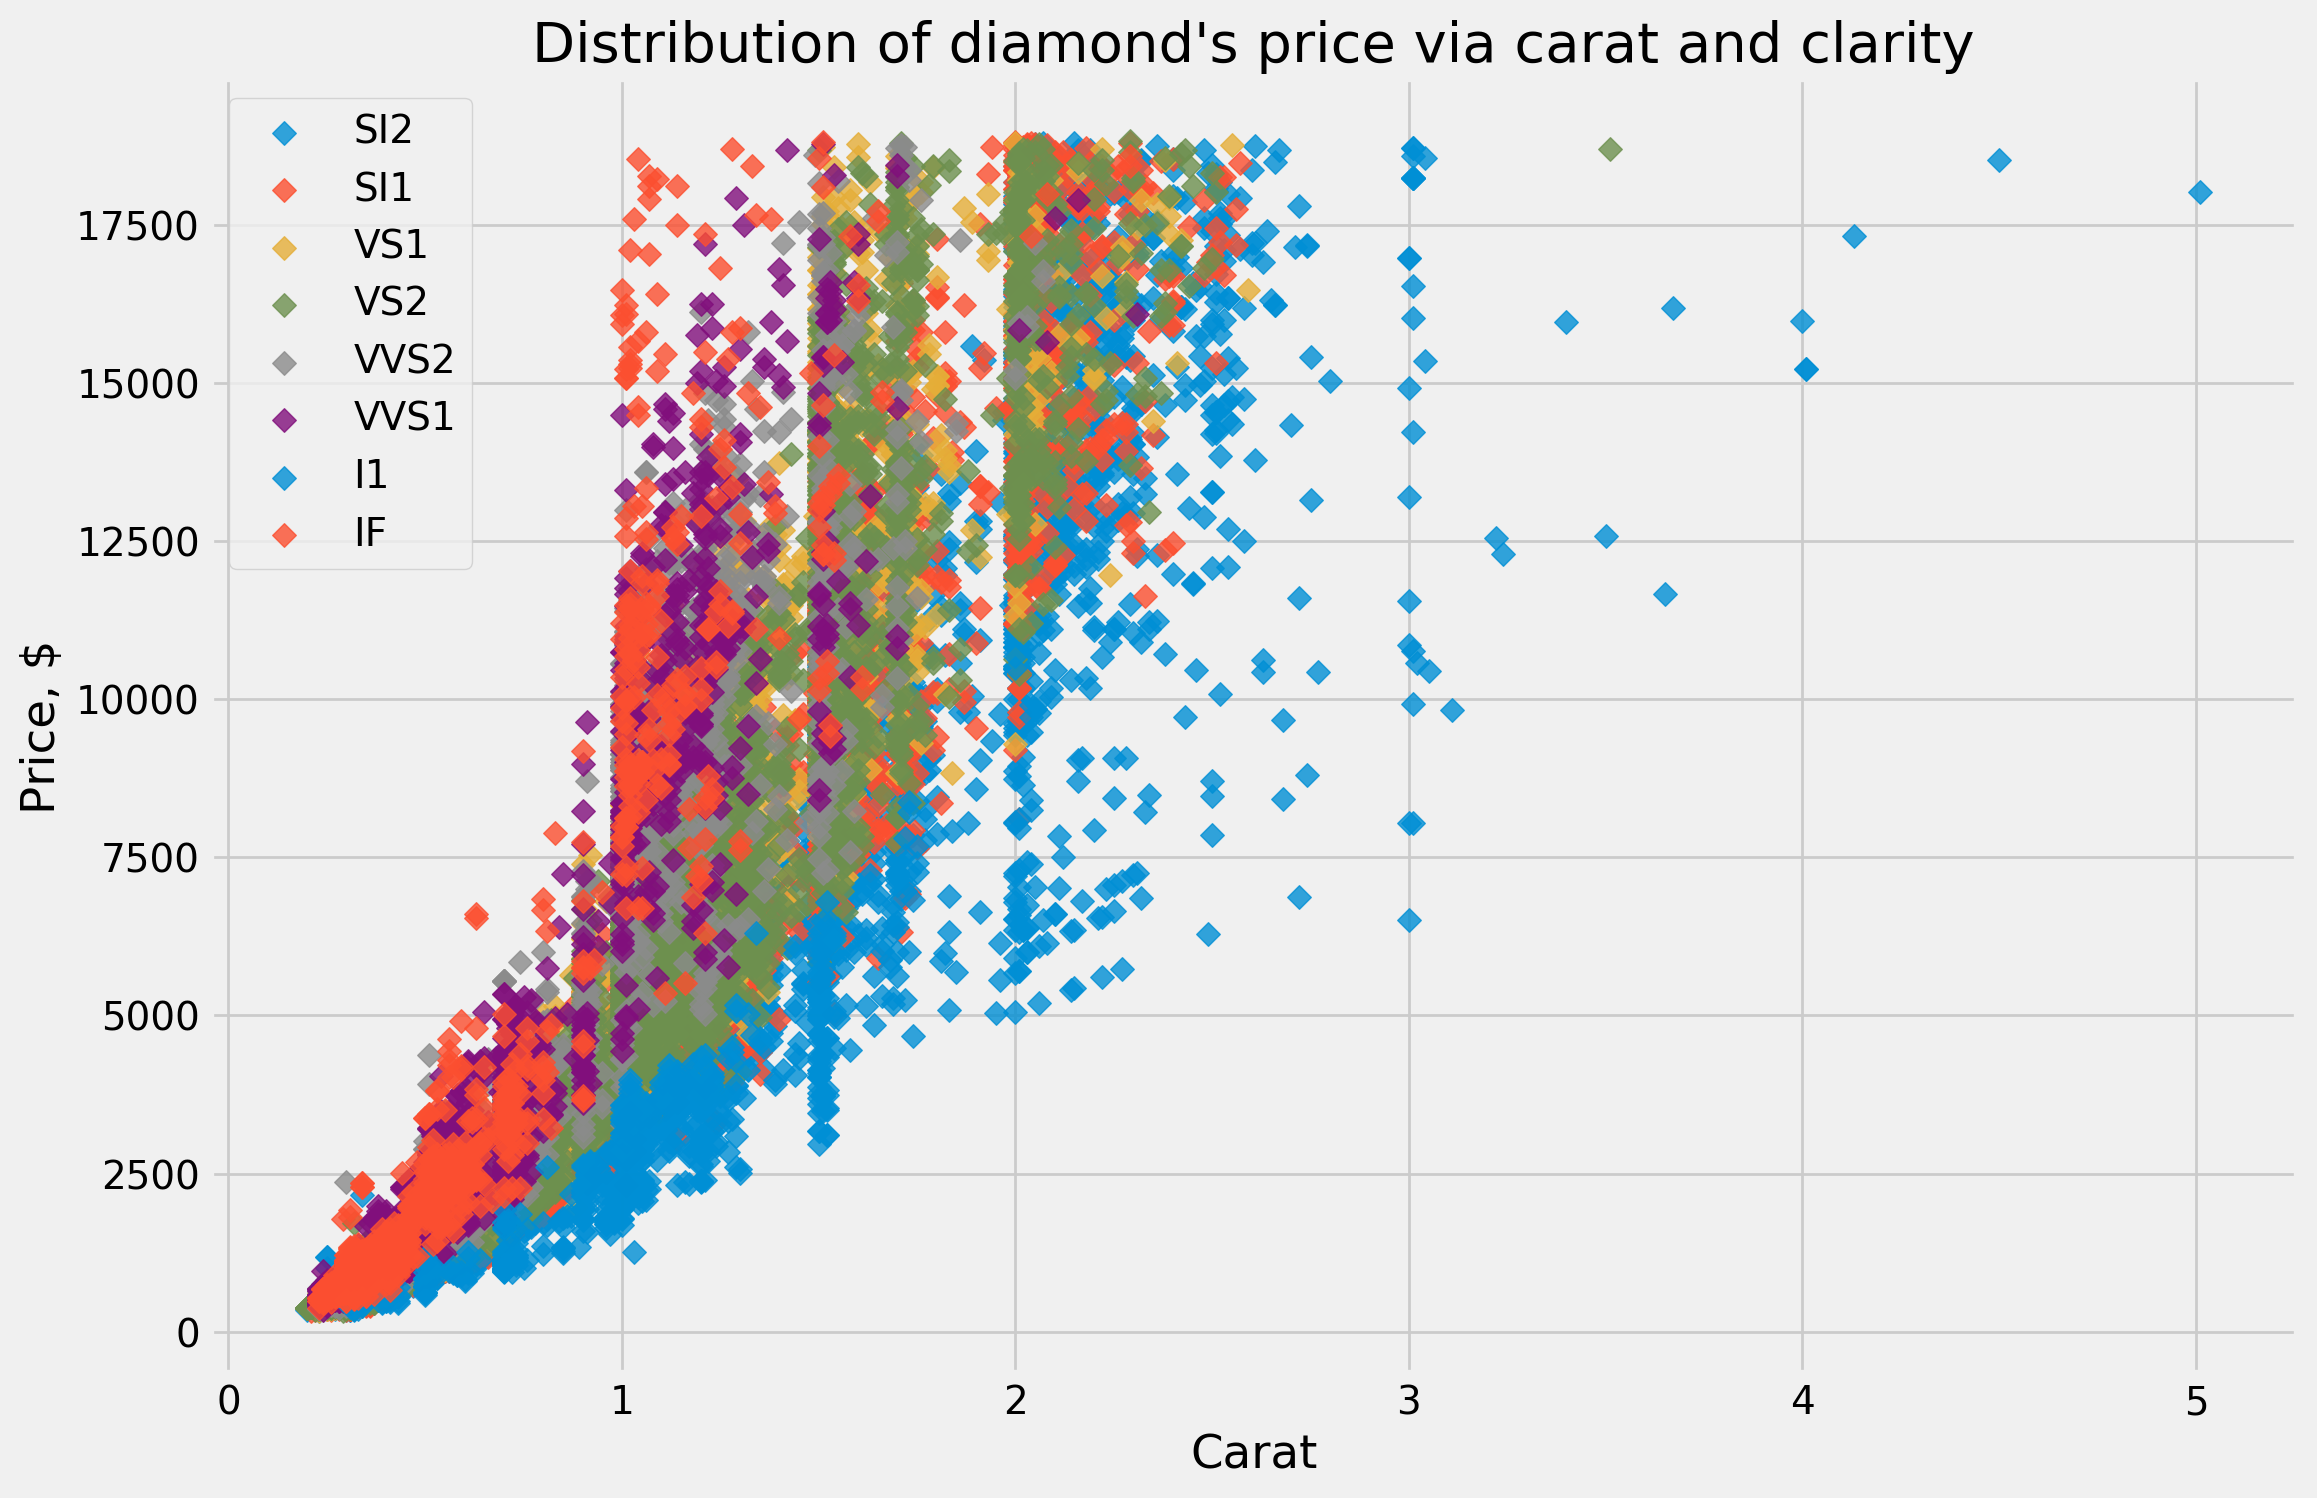

In [17]:
clarity_range = ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8), dpi=200)
for cal in clarity_range:   
    plt.scatter(df[df['clarity']== cal].carat , df[df['clarity']== cal].price, alpha=0.8, marker = 'D', label=cal)   
plt.xlabel('Carat')
plt.ylabel('Price, $')
plt.legend()
plt.title('''Distribution of diamond's price via carat and clarity''')
plt.show()

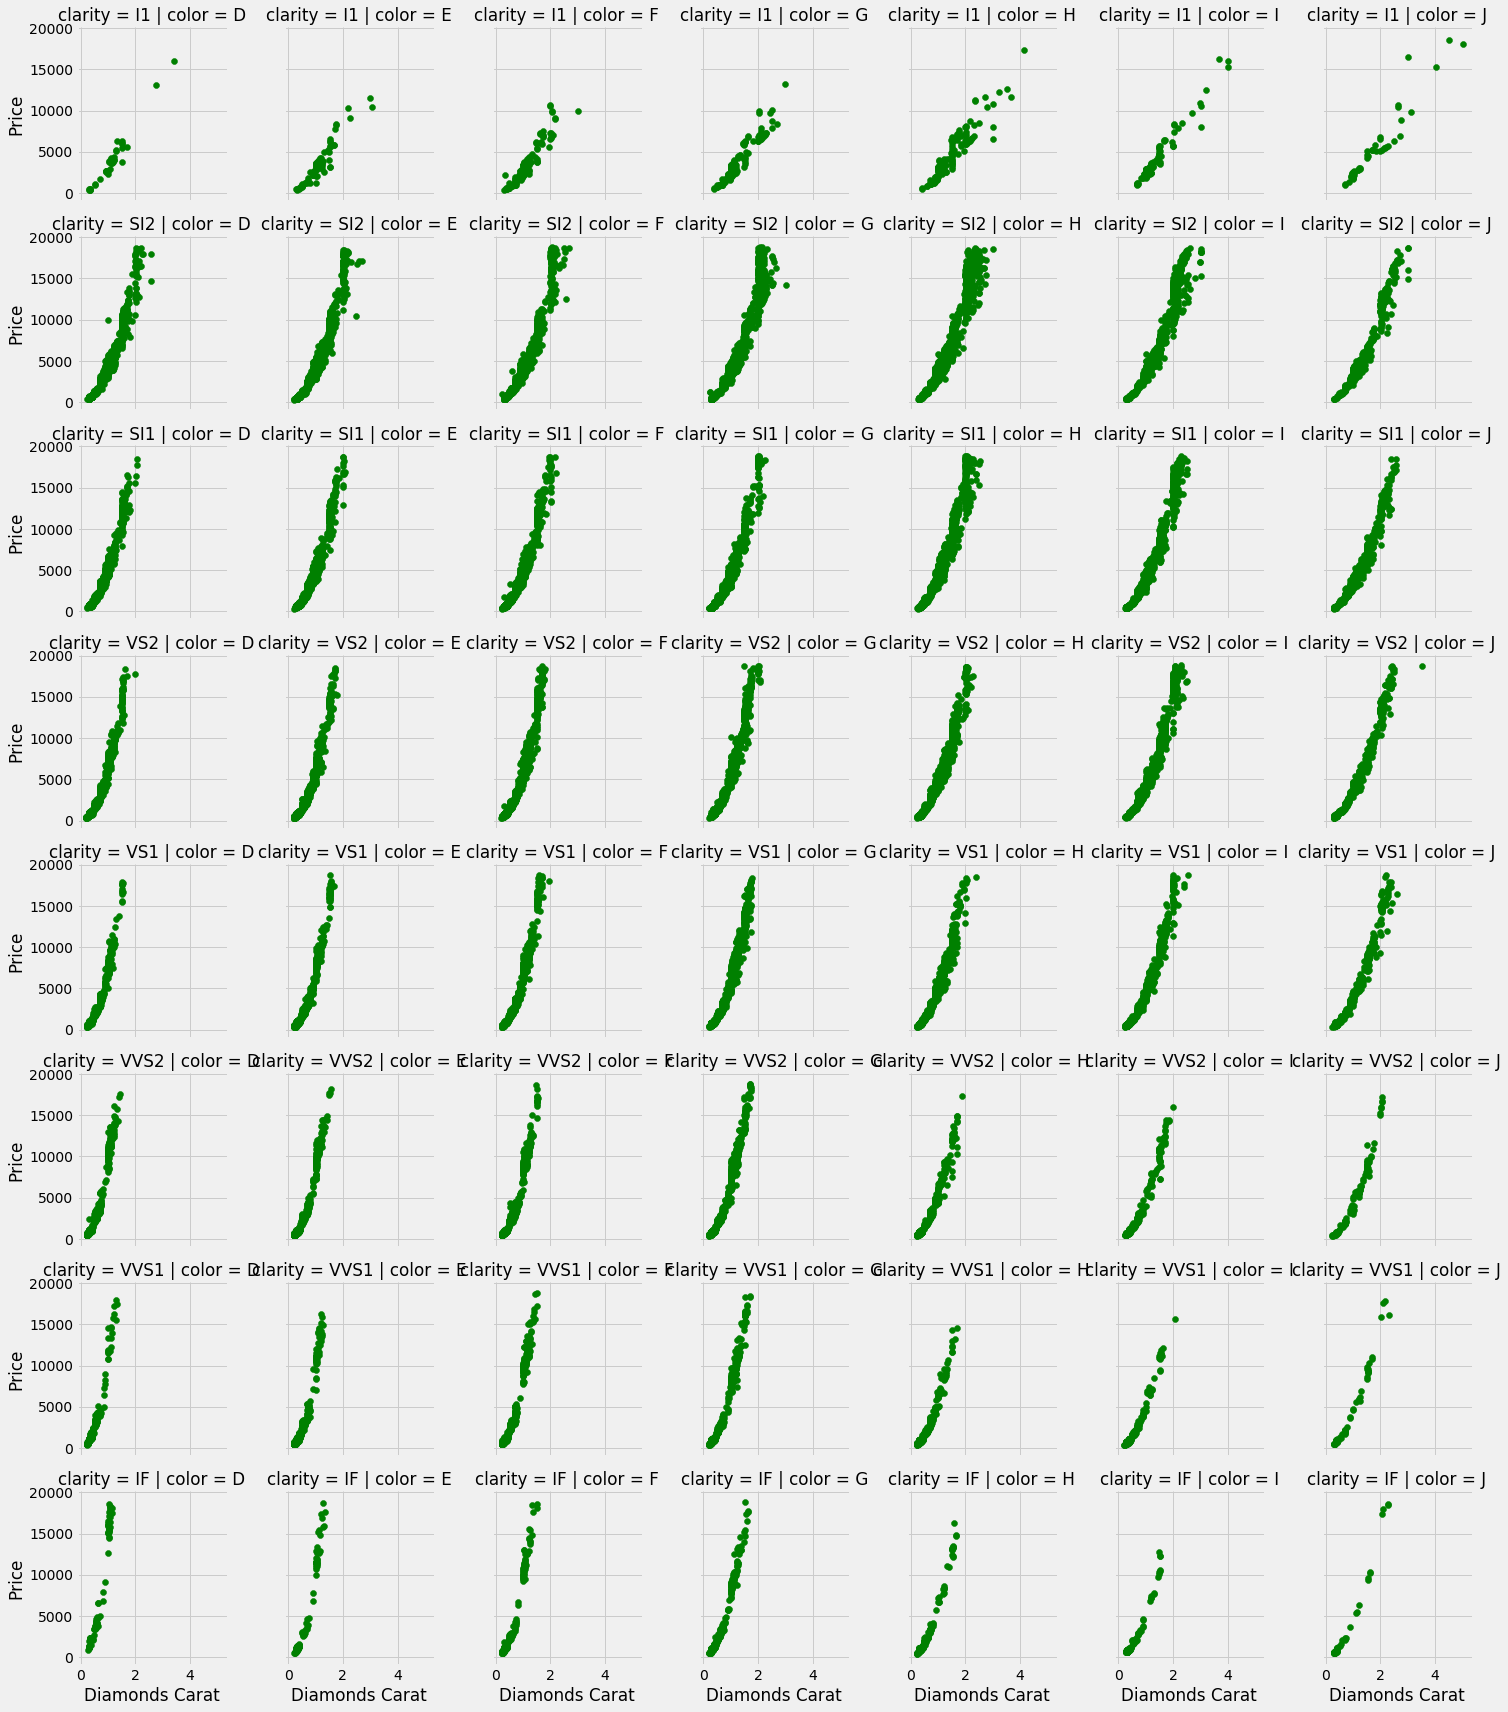

In [18]:
g = sns.FacetGrid(df, col="color", row="clarity")
g = (g.map(plt.scatter, "carat", "price", color="g").set_axis_labels("Diamonds Carat", "Price"))

# 4. Preprocessing Data

## One Hot Encoding 

In [19]:
target = df['price']

In [20]:
df_cat = df[["cut","color","clarity"]]
df_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [21]:
df = df.drop('price', axis=1)
df_num = df.drop(["cut","clarity","color"],axis=1)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_attribs = list(df_cat)
num_attribs = list(df_num)

pipeline = ColumnTransformer([
    ("cat",OneHotEncoder(),cat_attribs),
    ("num", StandardScaler(),num_attribs),
])

df_prepared = pipeline.fit_transform(df)

In [23]:
df_prepared

array([[ 0.        ,  0.        ,  1.        , ..., -1.59157321,
        -1.53921904, -1.58008358],
       [ 0.        ,  0.        ,  0.        , ..., -1.64517275,
        -1.66201364, -1.75089629],
       [ 0.        ,  1.        ,  0.        , ..., -1.50224063,
        -1.46027965, -1.75089629],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.06398612,
        -0.04814167,  0.02840279],
       [ 0.        ,  0.        ,  0.        , ...,  0.37374352,
         0.33778423,  0.28462185],
       [ 0.        ,  0.        ,  1.        , ...,  0.08787927,
         0.11850815,  0.14227793]])

### Mempersiapkan Data untuk splitting

In [24]:
data = df_prepared


# 5. Model Prediction and Evaluation

# Linear Regression

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=101)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error 

In [27]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Linear_Regression_Train

In [28]:
train_predictions_lr = lr.predict(X_train)

In [29]:
mae_train_lr = mean_absolute_error(y_train, train_predictions_lr)
print("MAE_Train: " , mae_train_lr)

mse_train_lr = mean_squared_error(y_train,train_predictions_lr)
print("MSE_Train: " , mse_train_lr)

rmse_train_lr = np.sqrt(mse_train_lr)   
print("RMSE_Train: " , rmse_train_lr)

r2_score_train_lr = r2_score(y_train, train_predictions_lr)
print("r2_Score_Train: " , r2_score_train_lr)

accuracy_train_lr = (lr.score(X_train,y_train)*100)
print("accuracy_Train: ", accuracy_train_lr,  "%")

MAE_Train:  736.7422984447859
MSE_Train:  1284335.3245734214
RMSE_Train:  1133.2851911912646
r2_Score_Train:  0.9194597106189648
accuracy_Train:  91.94597106189649 %


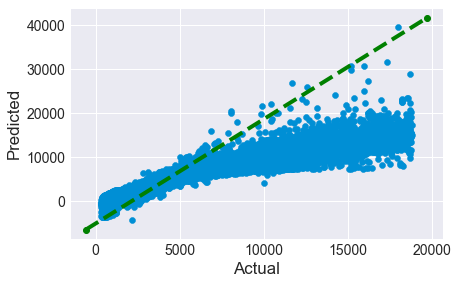

In [30]:
sns.set_style('darkgrid')
plt.scatter(y_train,train_predictions_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show() 

### Linear_Regression_Test

In [31]:
test_predictions_lr = lr.predict(X_test)

In [32]:
mae_test_lr = mean_absolute_error(y_test, test_predictions_lr)
print("MAE_Test: " , mae_test_lr)

mse_test_lr = mean_squared_error(y_test,test_predictions_lr)
print("MSE_Test: " , mse_test_lr)

rmse_test_lr = np.sqrt(mse_test_lr)   
print("RMSE_Test: " , rmse_test_lr)

r2_score_test_lr = r2_score(y_test, test_predictions_lr)
print("r2_Score_Test: " , r2_score_test_lr)

accuracy_test_lr = (lr.score(X_test,y_test)*100)
print("accuracy: ", accuracy_test_lr,  "%")


MAE_Test:  735.3104058481701
MSE_Test:  1239479.8497421914
RMSE_Test:  1113.3192937078704
r2_Score_Test:  0.9214783161624951
accuracy:  92.1478316162495 %


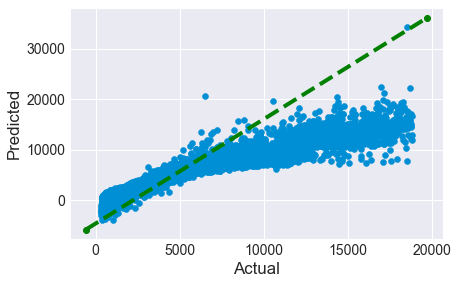

In [33]:
plt.scatter(y_test,test_predictions_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show()
sns.set_style('darkgrid')    

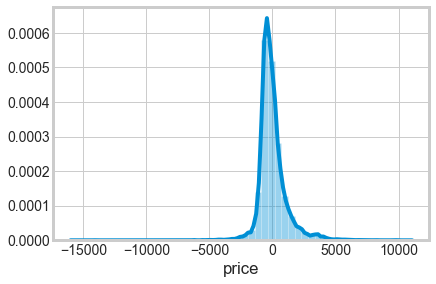

In [34]:
sns.set_style("whitegrid")
plt.subplots(figsize=(6,4))
sns.distplot((y_test-test_predictions_lr),bins=50)

# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso

ls= Lasso(normalize=True)
ls.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Lasso_Regression_Train

In [36]:
train_predictions_ls = ls.predict(X_train)

In [37]:
mae_train_ls = mean_absolute_error(y_train, train_predictions_ls)
print("MAE_Train: " , mae_train_ls)

mse_train_ls = mean_squared_error(y_train,train_predictions_ls)
print("MSE_Train: " , mse_train_lr)

rmse_train_ls = np.sqrt(mse_train_ls)   
print("RMSE_Train: " , rmse_train_ls)

r2_score_train_ls = r2_score(y_train, train_predictions_ls)
print("r2_Score_Train: " , r2_score_train_ls)

accuracy_train_ls = (ls.score(X_train,y_train)*100)
print("accuracy_Train: ", accuracy_train_ls,  "%")

MAE_Train:  865.2959673296835
MSE_Train:  1284335.3245734214
RMSE_Train:  1388.9694114451465
r2_Score_Train:  0.8790181778544859
accuracy_Train:  87.90181778544859 %


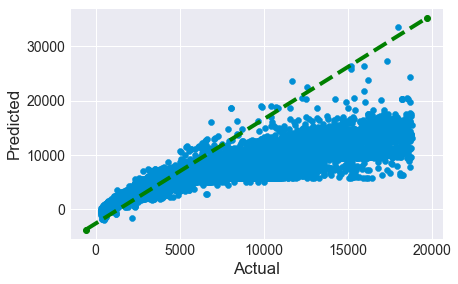

In [38]:
sns.set_style('darkgrid')
plt.scatter(y_train,train_predictions_ls)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show() 

### Lasso_Regression_Test

In [39]:
test_predictions_ls = ls.predict(X_test)

In [40]:
mae_test_ls = mean_absolute_error(y_test, test_predictions_ls)
print("MAE_Test: " , mae_test_ls)

mse_test_ls = mean_squared_error(y_test,test_predictions_ls)
print("MSE_Test: " , mse_test_ls)

rmse_test_ls = np.sqrt(mse_test_ls)   
print("RMSE_Test: " , rmse_test_ls)

r2_score_test_ls = r2_score(y_test, test_predictions_ls)
print("r2_Score_Test: " , r2_score_test_ls)

accuracy_test_ls = (ls.score(X_test,y_test)*100)
print("accuracy: ", accuracy_test_ls,  "%")


MAE_Test:  866.2678997512335
MSE_Test:  1923213.72621402
RMSE_Test:  1386.7998147584315
r2_Score_Test:  0.87816342460659
accuracy:  87.816342460659 %


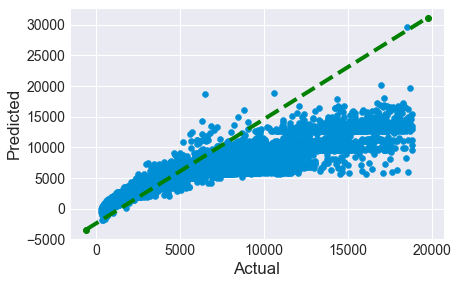

In [41]:
plt.scatter(y_test,test_predictions_ls)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show()

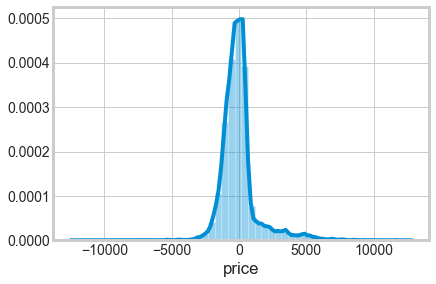

In [42]:
sns.set_style("whitegrid")
plt.subplots(figsize=(6,4))
sns.distplot((y_test-test_predictions_ls),bins=50)

# Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

### Decision_Tree_Train

In [44]:
train_predictions_dt = dt.predict(X_train)

In [45]:
mae_train_dt = mean_absolute_error(y_train, train_predictions_dt)
print("MAE_Train: " , mae_train_dt)

mse_train_dt = mean_squared_error(y_train,train_predictions_dt)
print("MSE_Train: " , mse_train_dt)

rmse_train_dt = np.sqrt(mse_train_dt)   
print("RMSE_Train: " , rmse_train_dt)

r2_score_train_dt = r2_score(y_train, train_predictions_dt)
print("r2_Score_Train: " , r2_score_train_dt)

accuracy_train_dt = (dt.score(X_train,y_train)*100)
print("accuracy_Train: ", accuracy_train_dt,  "%")

MAE_Train:  0.4247120955207008
MSE_Train:  81.41259979511092
RMSE_Train:  9.02289309451857
r2_Score_Train:  0.99999489463988
accuracy_Train:  99.99948946398801 %


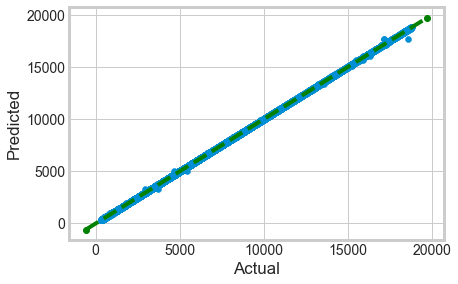

In [46]:
plt.scatter(y_train,train_predictions_dt)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show()

### Decision_Tree_Test

In [47]:
test_predictions_dt = dt.predict(X_test)

In [48]:
mae_test_dt = mean_absolute_error(y_test, test_predictions_dt)
print("MAE_Test: " , mae_test_dt)

mse_test_dt = mean_squared_error(y_test,test_predictions_dt)
print("MSE_Test: " , mse_test_dt)

rmse_test_dt = np.sqrt(mse_test_dt)   
print("RMSE_Test: " , rmse_test_dt)

r2_score_test_dt = r2_score(y_test, test_predictions_dt)
print("r2_Score_Test: " , r2_score_test_dt)

accuracy_test_dt = (dt.score(X_test,y_test)*100)
print("accuracy: ", accuracy_test_dt,  "%")


MAE_Test:  366.0996435047807
MSE_Test:  549083.6856883311
RMSE_Test:  741.0018122031356
r2_Score_Test:  0.9652152670518049
accuracy:  96.52152670518049 %


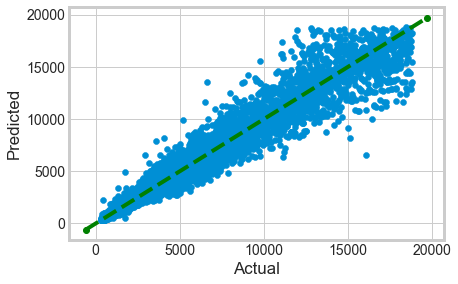

In [49]:
plt.scatter(y_test,test_predictions_dt)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show()

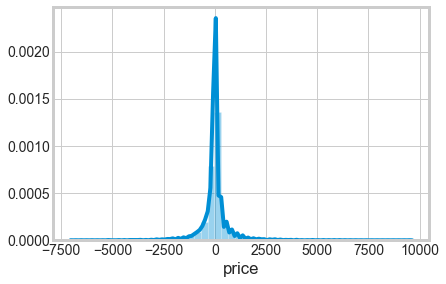

In [50]:
sns.set_style("whitegrid")
plt.subplots(figsize=(6,4))
sns.distplot((y_test-test_predictions_dt),bins=50)

# Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

### Random_Forest_Train

In [52]:
train_predictions_rf = rf.predict(X_train)

In [53]:
mae_train_rf = mean_absolute_error(y_train, train_predictions_rf)
print("MAE_Train: " , mae_train_rf)

mse_train_rf = mean_squared_error(y_train,train_predictions_rf)
print("MSE_Train: " , mse_train_rf)

rmse_train_rf = np.sqrt(mse_train_rf)   
print("RMSE_Train: " , rmse_train_rf)

r2_score_train_rf = r2_score(y_train, train_predictions_rf)
print("r2_Score_Train: " , r2_score_train_rf)

accuracy_train_rf = (rf.score(X_train,y_train)*100)
print("accuracy_Train: ", accuracy_train_rf,  "%")

MAE_Train:  114.38684825339631
MSE_Train:  59709.04353780735
RMSE_Train:  244.35434012476094
r2_Score_Train:  0.9962556634913106
accuracy_Train:  99.62556634913105 %


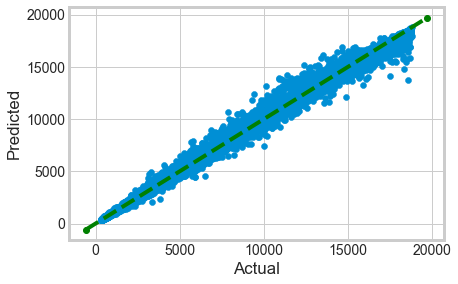

In [54]:
plt.scatter(y_train,train_predictions_rf)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show()

### Random_Forest_Test

In [55]:
test_predictions_rf = rf.predict(X_test)

In [56]:
mae_test_rf = mean_absolute_error(y_test, test_predictions_rf)
print("MAE_Test: " , mae_test_rf)

mse_test_rf = mean_squared_error(y_test,test_predictions_rf)
print("MSE_Test: " , mse_test_rf)

rmse_test_rf = np.sqrt(mse_test_rf)   
print("RMSE_Test: " , rmse_test_rf)

r2_score_test_rf = r2_score(y_test, test_predictions_rf)
print("r2_Score_Test: " , r2_score_test_rf)

accuracy_test_rf = (rf.score(X_test,y_test)*100)
print("accuracy: ", accuracy_test_rf,  "%")


MAE_Test:  289.62452079212
MSE_Test:  343868.7720427683
RMSE_Test:  586.4032503685227
r2_Score_Test:  0.9782157370242449
accuracy:  97.82157370242449 %


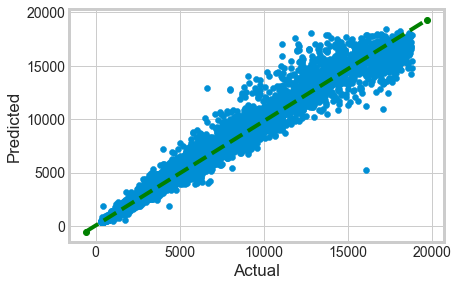

In [57]:
plt.scatter(y_test,test_predictions_rf)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show()

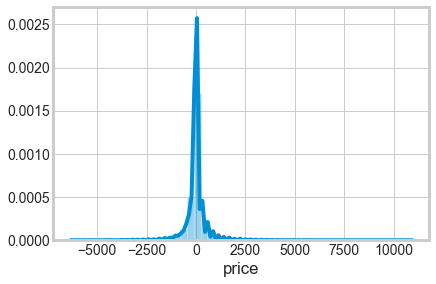

In [58]:
sns.set_style("whitegrid")
plt.subplots(figsize=(6,4))
sns.distplot((y_test-test_predictions_rf),bins=50)

In [59]:
hasil  = (y_test-test_predictions_rf)
hasil.head()

50904   -243.1
5302    -409.7
30152     18.8
23991    244.7
17935    305.8
Name: price, dtype: float64

# KNN Regressor

In [60]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

### KNN_Train

In [61]:
train_predictions_knn = knn.predict(X_train)

In [62]:
mae_train_knn = mean_absolute_error(y_train, train_predictions_knn)
print("MAE_Train: " , mae_train_knn)

mse_train_knn = mean_squared_error(y_train,train_predictions_knn)
print("MSE_Train: " , mse_train_knn)

rmse_train_knn = np.sqrt(mse_train_knn)   
print("RMSE_Train: " , rmse_train_knn)

r2_score_train_knn = r2_score(y_train, train_predictions_knn)
print("r2_Score_Train: " , r2_score_train_knn)

accuracy_train_knn = (knn.score(X_train,y_train)*100)
print("accuracy_Train: ", accuracy_train_knn,  "%")

MAE_Train:  329.5725254345062
MSE_Train:  397332.2233690123
RMSE_Train:  630.3429410797049
r2_Score_Train:  0.9750834134682239
accuracy_Train:  97.5083413468224 %


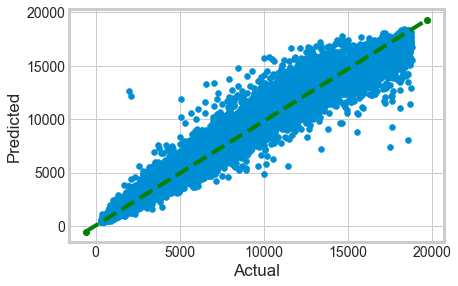

In [63]:
plt.scatter(y_train,train_predictions_knn)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show() 

### KNN_Test

In [64]:
test_predictions_knn = knn.predict(X_test)

In [65]:
mae_test_knn = mean_absolute_error(y_test, test_predictions_knn)
print("MAE_Test: " , mae_test_knn)

mse_test_knn = mean_squared_error(y_test,test_predictions_knn)
print("MSE_Test: " , mse_test_knn)

rmse_test_knn = np.sqrt(mse_test_knn)   
print("RMSE_Test: " , rmse_test_knn)

r2_score_test_knn = r2_score(y_test, test_predictions_knn)
print("r2_Score_Test: " , r2_score_test_knn)

accuracy_test_knn = (knn.score(X_test,y_test)*100)
print("accuracy: ", accuracy_test_knn,  "%")


MAE_Test:  412.35033382789317
MSE_Test:  631702.6065504452
RMSE_Test:  794.7972109604092
r2_Score_Test:  0.9599813160648001
accuracy:  95.99813160648 %


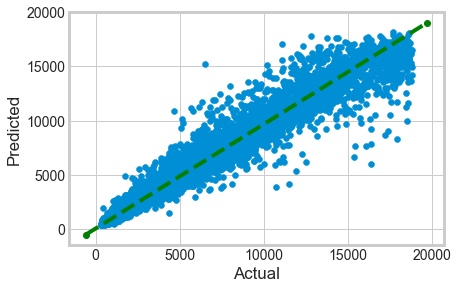

In [66]:
plt.scatter(y_test,test_predictions_knn)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim, y_lim, "go--")
plt.show()

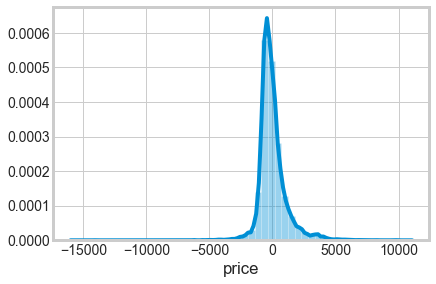

In [67]:
sns.set_style("whitegrid")
plt.subplots(figsize=(6,4))
sns.distplot((y_test-test_predictions_lr),bins=50)

# 6. Comparing Model Score

In [68]:
model = ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'KNN Regressor']
score = [accuracy_test_lr, accuracy_test_ls, accuracy_test_dt, accuracy_test_rf, accuracy_test_knn]
dfModel = pd.DataFrame({'Model':model,
                        'r2 score test Score':score
                       })
dfModel

,Model,r2 score test Score
0,Linear Regression,92.147832
1,Lasso Regression,87.816342
2,Decision Tree,96.521527
3,Random Forest,97.821574
4,KNN Regressor,95.998132


In [69]:
dfModel.sort_values(by='r2 score test Score' ,ascending=False)

,Model,r2 score test Score
3,Random Forest,97.821574
2,Decision Tree,96.521527
4,KNN Regressor,95.998132
0,Linear Regression,92.147832
1,Lasso Regression,87.816342


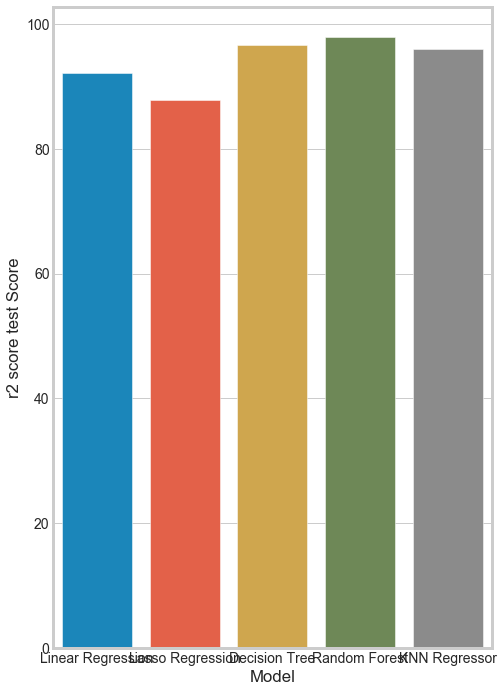

In [70]:
plt.figure(figsize=(7,11))
sns.barplot(x='Model' , y='r2 score test Score' , data=dfModel)

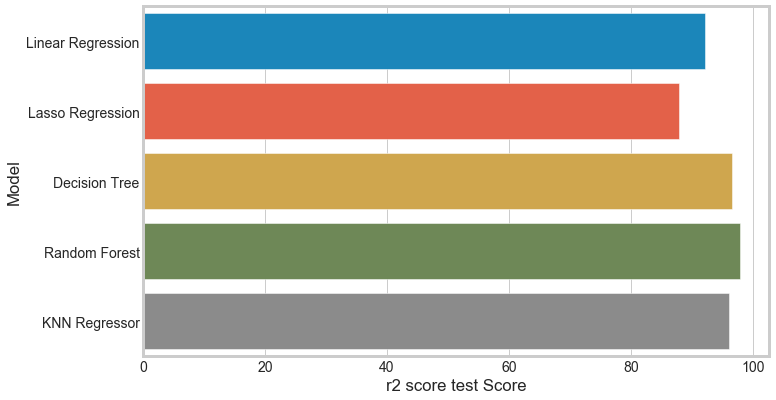

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(x='r2 score test Score' , y='Model' , data=dfModel)

#### Coba Prediksi memakai data di index[0]

In [72]:
cobapredictions = rf.predict([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -1.19820422, -0.17420303, -1.09972532, -1.59157321, -1.53921904,
       -1.58008358]])
cobapredictions

array([343.9])

## Hasil Prediksi dr Model Random Forest Regressor

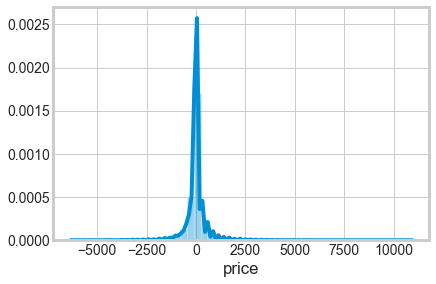

In [73]:
sns.set_style("whitegrid")
plt.subplots(figsize=(6,4))
sns.distplot((y_test-test_predictions_rf),bins=50)

In [74]:
index = hasil.index

In [75]:
dfRF = pd.DataFrame(data=hasil,
                   index=index)
dfRF.head()

,price
50904,-243.1
5302,-409.7
30152,18.8
23991,244.7
17935,305.8


In [76]:
dfRFmax = (dfRF[dfRF['price']>2500])
len(dfRFmax)

90

In [77]:
dfRFmin = (dfRF[dfRF['price']<-2500])
len(dfRFmin)

100

#### Menganalisa hasil prediksi error diatas 2500

In [78]:
dfRFmax.index

Int64Index([27747, 26993, 27460, 27248, 27016, 27637, 26929, 25166, 27069,
            27303, 27564, 27740, 27736, 27660, 27661, 26613, 27584, 27607,
            26759, 27177, 26302, 27484, 27019, 27005, 26914, 23256, 26264,
            24657, 27124, 27643, 27211, 16763, 27591, 27451, 26219, 26099,
            26066, 27459, 27222, 27282, 27119, 26263, 27244, 26902, 19502,
            27268, 26292, 27164, 26542, 27194, 25586, 27425, 26999, 27293,
            26465, 27519, 27326, 27339, 27333, 26814, 26898, 17130, 25846,
            25843, 27606, 27187, 25884, 27336, 27237, 27635, 27433, 26640,
            25019, 27317, 27481, 26495, 26797, 25966, 27287, 27167, 26827,
            27667, 26490, 25605, 26147, 27029, 26987, 26328, 24937, 25625],
           dtype='int64')

In [81]:
df = pd.read_csv('diamonds.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [82]:
df_rf_max = df.iloc[[27747, 26993, 27460, 27248, 27016, 27637, 26929, 25166, 27069,
            27303, 27564, 27740, 27736, 27660, 27661, 26613, 27584, 27607,
            26759, 27177, 26302, 27484, 27019, 27005, 26914, 23256, 26264,
            24657, 27124, 27643, 27211, 16763, 27591, 27451, 26219, 26099,
            26066, 27459, 27222, 27282, 27119, 26263, 27244, 26902, 19502,
            27268, 26292, 27164, 26542, 27194, 25586, 27425, 26999, 27293,
            26465, 27519, 27326, 27339, 27333, 26814, 26898, 17130, 25846,
            25843, 27606, 27187, 25884, 27336, 27237, 27635, 27433, 26640,
            25019, 27317, 27481, 26495, 26797, 25966, 27287, 27167, 26827,
            27667, 26490, 25605, 26147, 27029, 26987, 26328, 24937, 25625]]

In [84]:
df_rf_max.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
26993,2.00,Good,D,SI2,64.1,57.0,17094,7.91,7.82,5.04
27460,2.04,Premium,H,SI1,63.0,58.0,18115,8.10,8.03,5.08
27248,2.06,Premium,G,SI2,62.7,58.0,17650,8.12,8.09,5.08
27016,2.71,Premium,E,SI2,60.4,59.0,17146,9.13,9.03,5.48


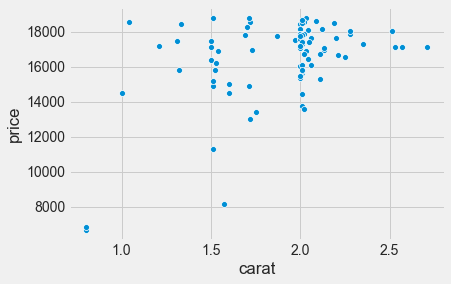

In [89]:
sns.scatterplot(x=df_rf_max['carat'], y=df_rf_max['price'])

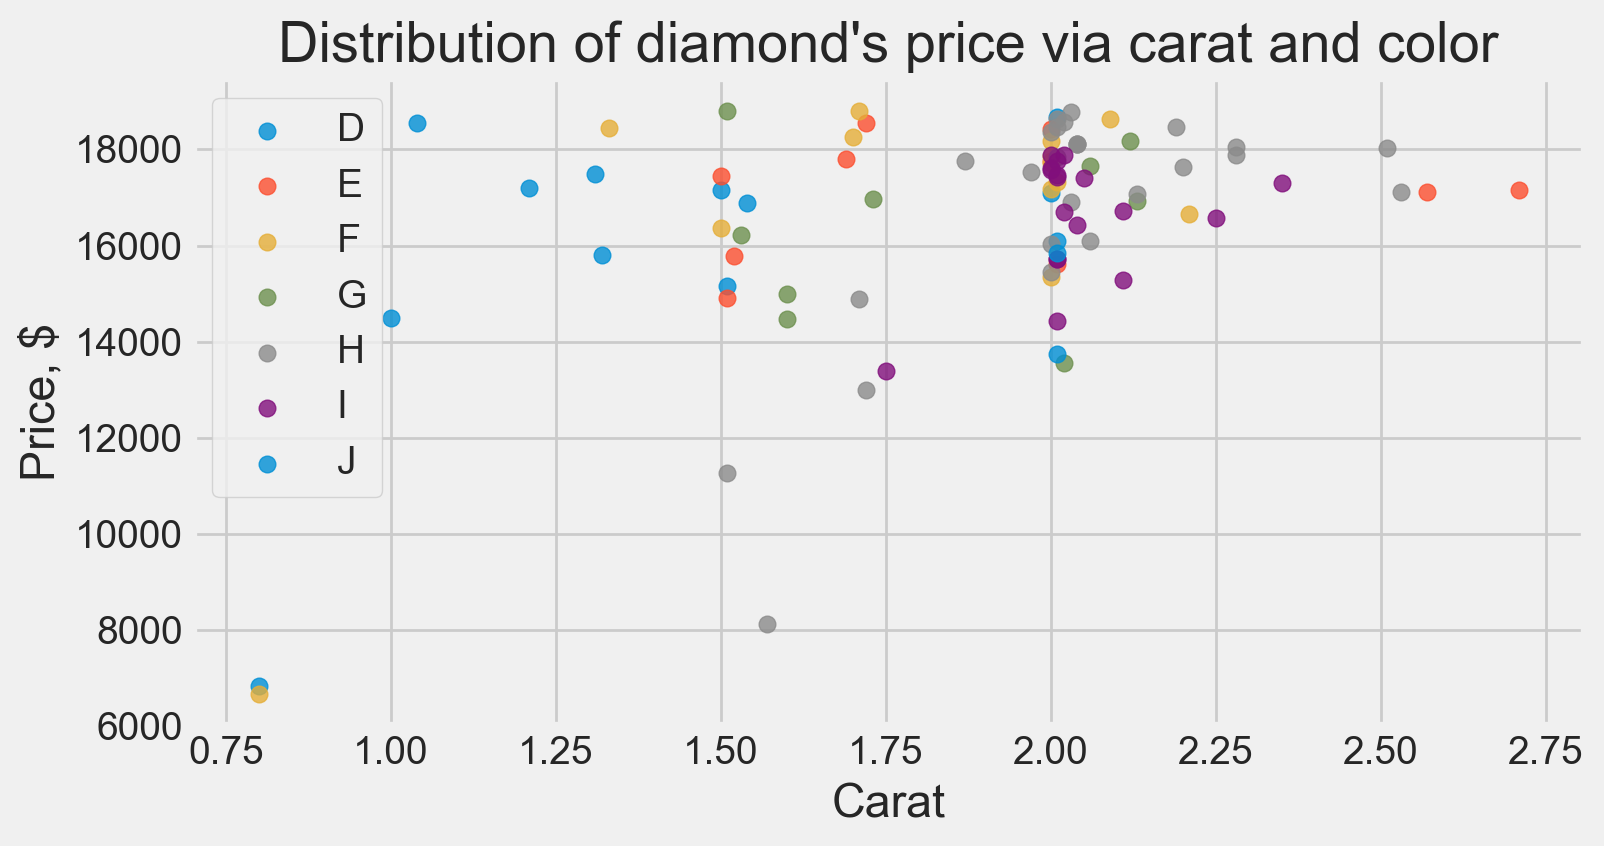

In [88]:
color_range = ['D', 'E', 'F', 'G', 'H','I','J']
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,4), dpi=200)
for col in color_range:   
    plt.scatter(df_rf_max[df_rf_max['color']== col].carat, df_rf_max[df_rf_max['color']== col].price, alpha=0.8, marker = 'o', label=col)   
plt.xlabel('Carat')
plt.ylabel('Price, $')
plt.legend()
plt.title('''Distribution of diamond's price via carat and color''')
plt.show()

#### Menganalisa hasil prediksi error dibawah 2500

In [90]:
dfRFmin.index

Int64Index([24539, 19058, 25470, 23065, 23889,  6341, 25234, 24859, 21519,
            14229, 20294, 24165, 21330, 17980, 19314, 20645, 23905, 11540,
            16283, 21674, 23201, 22990, 19252, 24128, 14280, 18207, 22710,
            25579, 24845, 23001, 23612, 25660, 24181, 22144, 23960, 18252,
            19331, 24009, 21155, 25181, 22814, 22289, 20133, 16528, 24105,
            20907, 21724, 24429, 18590, 21726, 21417, 24910, 21630, 23485,
            24584, 25621, 21723, 17594, 20607, 23121, 23195, 20482, 23870,
            25539, 25838, 24425, 25306, 25124, 23965, 25480, 24890, 14926,
            24886, 24122, 23806, 16602, 19544, 23933, 21466, 24114, 24024,
            20838, 24673, 15439, 24447, 22991, 20249, 25649, 25115, 23972,
            25280, 23091, 23621, 18410, 24082, 18959, 22055, 25175, 24588,
            25194],
           dtype='int64')

In [91]:
df_rf_min = df.iloc[[24539, 19058, 25470, 23065, 23889,  6341, 25234, 24859, 21519,
            14229, 20294, 24165, 21330, 17980, 19314, 20645, 23905, 11540,
            16283, 21674, 23201, 22990, 19252, 24128, 14280, 18207, 22710,
            25579, 24845, 23001, 23612, 25660, 24181, 22144, 23960, 18252,
            19331, 24009, 21155, 25181, 22814, 22289, 20133, 16528, 24105,
            20907, 21724, 24429, 18590, 21726, 21417, 24910, 21630, 23485,
            24584, 25621, 21723, 17594, 20607, 23121, 23195, 20482, 23870,
            25539, 25838, 24425, 25306, 25124, 23965, 25480, 24890, 14926,
            24886, 24122, 23806, 16602, 19544, 23933, 21466, 24114, 24024,
            20838, 24673, 15439, 24447, 22991, 20249, 25649, 25115, 23972,
            25280, 23091, 23621, 18410, 24082, 18959, 22055, 25175, 24588,
            25194]]
df_rf_min.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
24539,2.01,Ideal,G,SI1,61.6,57.0,12829,8.08,8.00,4.95
19058,1.72,Ideal,H,SI1,62.2,57.0,7840,7.65,7.55,4.72
25470,2.02,Premium,I,VS1,60.5,62.0,14238,8.18,8.15,4.94
23065,2.07,Premium,H,SI2,59.6,60.0,11094,8.30,8.24,4.93
23889,2.40,Ideal,I,SI2,62.8,57.0,11988,8.52,8.49,5.34


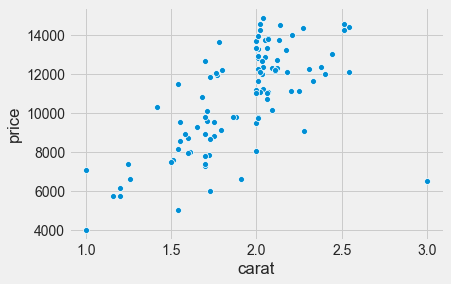

In [93]:
sns.scatterplot(x=df_rf_min['carat'], y=df_rf_min['price'])

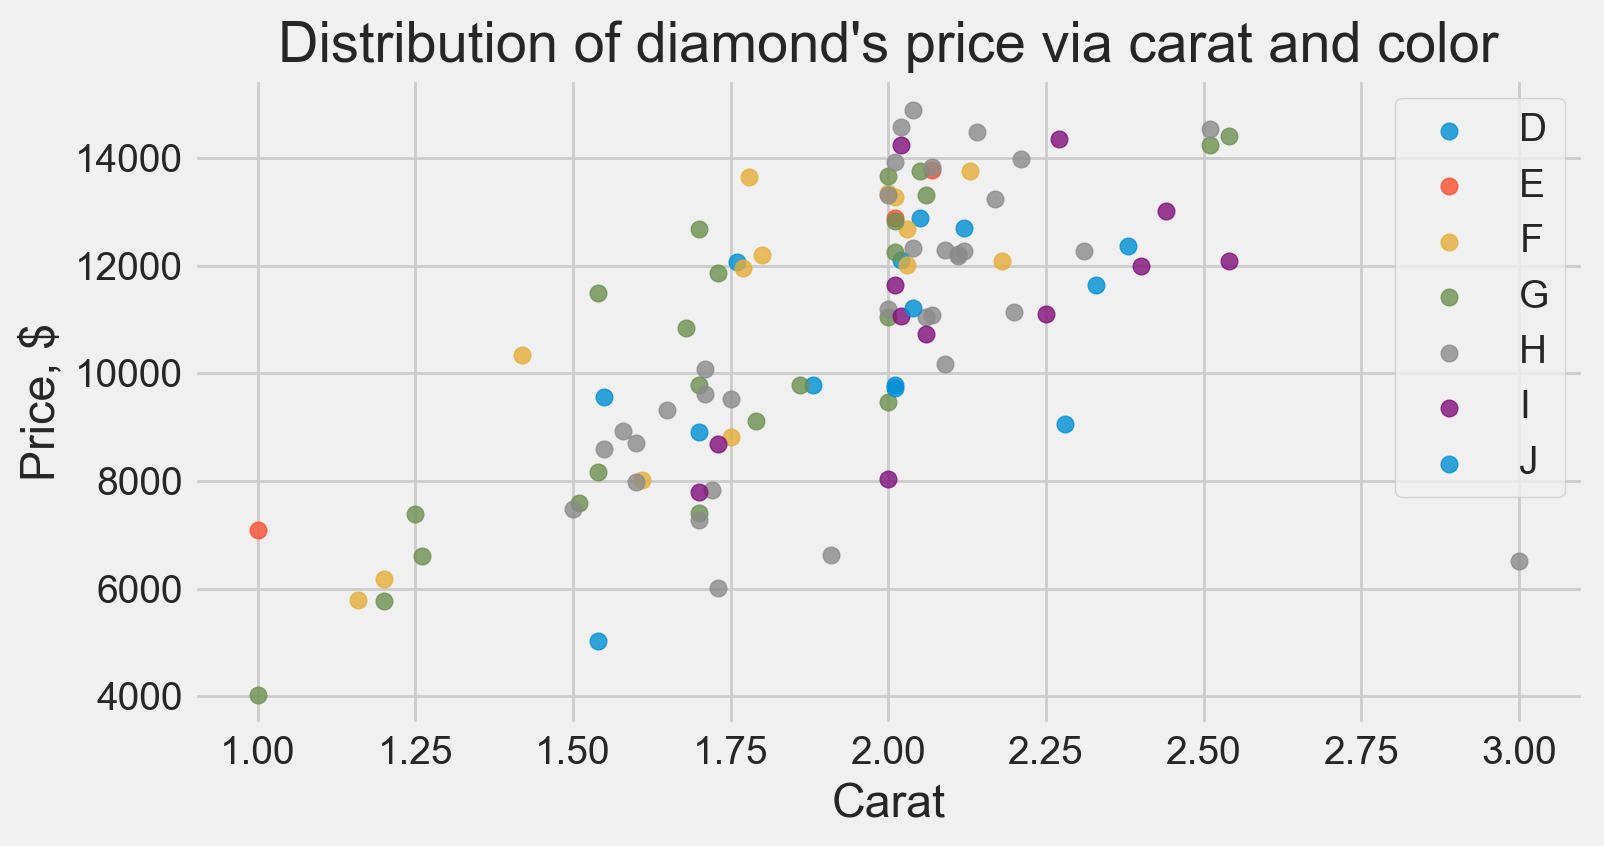

In [94]:
color_range = ['D', 'E', 'F', 'G', 'H','I','J']
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,4), dpi=200)
for col in color_range:   
    plt.scatter(df_rf_min[df_rf_min['color']== col].carat, df_rf_min[df_rf_min['color']== col].price, alpha=0.8, marker = 'o', label=col)   
plt.xlabel('Carat')
plt.ylabel('Price, $')
plt.legend()
plt.title('''Distribution of diamond's price via carat and color''')
plt.show()

# Conclusion
Model ini bisa dipakai tetapi ada sekitar 190 data yg angka errornya berselisih 2500 keatas. Dan error berada di kisaran karat 1 sampai dengan 3 dengan range harga diatas 4000